## Multilayer Perceptron (MLP)

- Camadas intermediárias
- Arquitetura feedforward
- aprendizagem por retropropagação (backpropagation)

<img src="images/MLP.png">

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import math

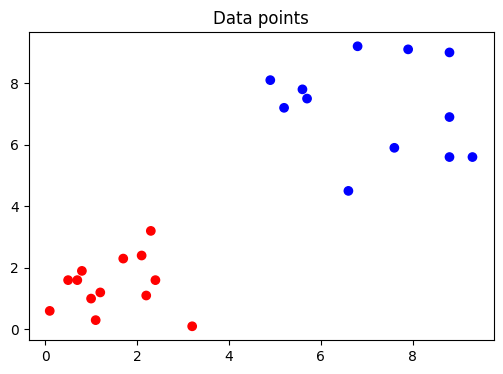

In [14]:
np.random.seed(42)

x = np.array([[1.0, 1.0], [2.1, 2.4], [1.1, 0.3], [2.3, 3.2], [0.1, 0.6],
              [0.5, 1.6], [1.7, 2.3], [0.7, 1.6], [3.2, 0.1], [2.2, 1.1],
              [0.8, 1.9], [2.4, 1.6], [1.2, 1.2], [5.2, 7.2], [6.6, 4.5],
              [4.9, 8.1], [7.6, 5.9], [8.8, 9.0], [5.6, 7.8], [8.8, 5.6],
              [7.9, 9.1], [6.8, 9.2], [8.8, 6.9], [9.3, 5.6], [5.7, 7.5]
             ])


d = np.array([[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],
              [0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0]])

# x = np.array([[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]])
# d = np.array([[0],[1],[1],[0]])

shuffle = np.random.permutation(len(x))
x = x[shuffle]
d = d[shuffle]

plt.figure(figsize=(6,4))
plt.title("Data points")
plt.scatter(x[:, 0], x[:, 1], c = d, cmap = 'bwr')
plt.show()

In [15]:
class MLP():
    
    def __init__(self, lr, e, neurons):
        """ Construtor """
        # Taxa de aprendizado 
        self.lr = lr
        
        # tolerância
        self.e = e
        
        # Quantidade de neurônios por camadas
        self.neurons = neurons
        
        
    def sigmoid(self, valor):
        '''Calcula a sigmoid de um valor'''
        return (1/(1+math.e**(-valor)))

    def sigmoid_deriv(self, valor):
        '''Calcula a derivada da função sigmoid'''
        sig = self.sigmoid(valor)
        return sig*(1 - sig)

    def activate(self, valor):
        '''Ativa as saídas do neurônio'''
        return self.sigmoid(valor)
    
    def deriv(self, valor):
        '''Calcular a derivada da função de ativação'''
        return self.sigmoid_deriv(valor)

    def evaluate(self, target, predicted):
        '''Calcula a diferença entre o valor real e o valor predito'''
        return (target - predicted)

    def predict(self, input_data, weights):
        '''Calcula a soma ponderada das entradas pelo peso'''
        return np.dot(input_data, weights).reshape(1, -1)
    
    
    def train(self, x, d):
        ''' 
        Definir aleatoriamente os pesos, o bias e o peso do bias
        Enquanto a diferença entre m mse_anterior e o mse_atual for maior que 'e' continua o processo 
        '''
        self.w1 = np.random.random((x.shape[1]+1,self.neurons[0]))
        self.w2 = np.random.random((self.neurons[0], self.neurons[1]))
        self.w3 = np.random.random((self.neurons[1], self.neurons[2]))
        
        epoch = 0
        last_mse = np.inf
        self.total_mse = []
        self.bias = -1
        
        while True:
            mse = 0
            for xi, target in zip(x,d):
                input_value = np.insert(xi, 0, self.bias)
                i1 = self.predict(input_value, self.w1)
                y1 = self.activate(i1)
                i2 = self.predict(y1, self.w2)
                y2 = self.activate(i2)
                i3 = self.predict(y2, self.w3)
                y3 = self.activate(i3)
                current_error = self.evaluate(target, y3)
                mse+=(current_error ** 2)

                delta3 = (target - y3) * self.deriv(i3)
                self.w3 += self.lr * np.dot(y2.T, delta3)

                delta2 = np.dot(delta3, self.w3.T) * self.deriv(i2)
                self.w2 += self.lr * np.dot(y1.T, delta2)

                delta1 = np.dot(delta2, self.w2.T) * self.deriv(i1)
                self.w1 += self.lr * np.dot(input_value.reshape(1, -1).T, delta1)

            mse = mse / len(x)
            
            print(f"EPOCH: {epoch} - MSE: {mse} - |mse_ant - mse|: {abs(last_mse - mse)}")
            if abs(last_mse - mse) <= self.e:
                break
            
            self.total_mse.append(mse)
            last_mse = mse
            epoch += 1
            
            
    def test(self, x):
        ''' Dado uma lista de X, submete-os à rede'''
        results = []
        for xi in x:
            input_value = np.insert(xi, 0, self.bias)
            i1 = self.predict(input_value, self.w1)
            y1 = self.activate(i1)
            i2 = self.predict(y1, self.w2)
            y2 = self.activate(i2)
            i3 = self.predict(y2, self.w3)
            y3 = self.activate(i3)
            
            results.append(int(np.rint(y3)))
            
        return results

In [16]:
rede = MLP(lr = 0.1, e = 1e-6, neurons = [4, 3, 1])
rede.train(x = x, d = d)

EPOCH: 0 - MSE: [[0.26661027]] - |mse_ant - mse|: [[inf]]
EPOCH: 1 - MSE: [[0.26066648]] - |mse_ant - mse|: [[0.00594379]]
EPOCH: 2 - MSE: [[0.25724838]] - |mse_ant - mse|: [[0.0034181]]
EPOCH: 3 - MSE: [[0.25537934]] - |mse_ant - mse|: [[0.00186903]]
EPOCH: 4 - MSE: [[0.2543954]] - |mse_ant - mse|: [[0.00098394]]
EPOCH: 5 - MSE: [[0.25389428]] - |mse_ant - mse|: [[0.00050113]]
EPOCH: 6 - MSE: [[0.25364775]] - |mse_ant - mse|: [[0.00024652]]
EPOCH: 7 - MSE: [[0.25353149]] - |mse_ant - mse|: [[0.00011626]]
EPOCH: 8 - MSE: [[0.25347961]] - |mse_ant - mse|: [[5.18795046e-05]]
EPOCH: 9 - MSE: [[0.25345805]] - |mse_ant - mse|: [[2.15667994e-05]]
EPOCH: 10 - MSE: [[0.25344963]] - |mse_ant - mse|: [[8.4192035e-06]]
EPOCH: 11 - MSE: [[0.253446]] - |mse_ant - mse|: [[3.62115681e-06]]
EPOCH: 12 - MSE: [[0.25344334]] - |mse_ant - mse|: [[2.66681095e-06]]
EPOCH: 13 - MSE: [[0.25344003]] - |mse_ant - mse|: [[3.31127609e-06]]
EPOCH: 14 - MSE: [[0.25343555]] - |mse_ant - mse|: [[4.47754963e-06]]
EPOC

In [17]:
x_teste = np.array([[1.0, 9.0],[7.4, 4.5],[6.1, 3.2],[1.2, 5.7],[2.4, 3.8],[6.3, 4.9]])
#x_teste = np.array([[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]])

teste_resultado = rede.test(x_teste)
teste_resultado

C:\Users\cinqu\AppData\Local\Temp\ipykernel_26592\827752972.py:100: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  results.append(int(np.rint(y3)))


[0, 0, 0, 1, 1, 0]

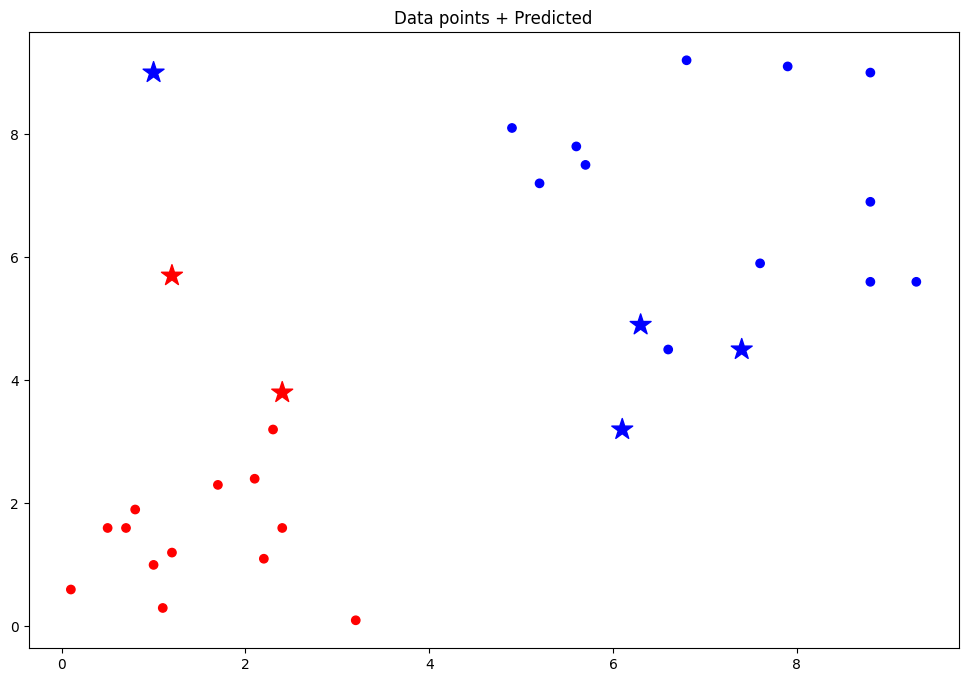

In [18]:
plt.figure(figsize=(12,8))
plt.title("Data points + Predicted")
plt.scatter(x[:, 0], x[:, 1], c = d, cmap = 'bwr')
plt.scatter(x_teste[:, 0], x_teste[:, 1], c = teste_resultado, cmap = 'bwr', marker = "*", s=250)
plt.show()

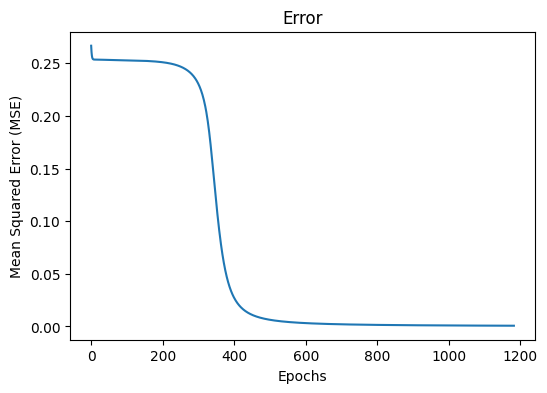

In [23]:
rede2 = rede

# Converter a lista para um array NumPy e ajustar a forma
total_mse_array = np.array(rede2.total_mse).reshape(-1)

# Criação da figura
plt.figure(figsize=(6, 4))
plt.title("Error")
plt.plot(total_mse_array)  # Usando o array ajustado
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.show()